# Kepler’s THIRD Laws of Planetary Motion

The following program computes the __orbital period__ given for the eight planets and one DWARF planet of the solar system. In fact, this is also an approximation because the mutual influence of planets is neglected. In other words, Kepler’s third law assumes a two-body system (the Sun and a single planet). It is more accurate than the test-mass approximation (m = 0) though. The code compares the periods resulting from the two-body and test-mass formulas.

In [11]:
import math
import numpy as np
from scipy.constants import year,hour,au,G
from astropy.constants import M_sun

M = M_sun.value # mass of the Sun in kg 7
# orbital parameters of planets
# see https://nssdc.gsfc.nasa.gov/planetary/factsheet/
#mass in kg
m = 1e24 * np.array([0.33011, 4.8675, 5.9723, 0.64171,1898.19, 568.34, 86.813, 102.413,0.0130])

# semi-major axis in m
a = 1e9 * np.array([57.9, 108.21, 149.60, 227.92,778.57, 1433.53, 2872.46, 4495.06,5906.4])

# use Kepler’s third law to calculate period in s
T_test_mass = 2*math.pi * (G*M)**(-1/2) * a**(3/2)
T_two_body = 2*math.pi * (G*(M + m))**(-1/2) * a**(3/2)

print("T [yr] dev [hr] dev rel.")
for val1,val2 in zip(T_test_mass,T_two_body):
    dev = val1 - val2
    if dev > hour:
        line = "{0:6.2f} {1:<7.1f} {2:.1e}" 
    else:
        line = "{0:6.2f} {1:7.4f} {2:.1e}" 
    print(line.format(val2/year, dev/hour, dev/val1)) 

T [yr] dev [hr] dev rel.
  0.24  0.0002 8.3e-08
  0.62  0.0066 1.2e-06
  1.00  0.0132 1.5e-06
  1.88  0.0027 1.6e-07
 11.88 49.6    4.8e-04
 29.68 37.2    1.4e-04
 84.20 16.1    2.2e-05
164.82 37.2    2.6e-05
248.26  0.0071 3.3e-09


Power laws, such as P ∝ a^(2/3),   appear as straight lines with slope equal to the exponent in a double-logarithmic diagram:  
__log P = (2/3) * log(a) + const.__

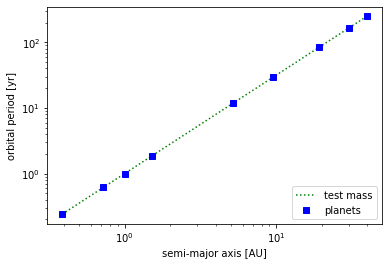

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.loglog(a/au, T_test_mass/year, 'green', linestyle=':',label='test mass')
plt.loglog(a/au, T_two_body/year, 'bs', label='planets')
plt.legend(loc='lower right')
plt.xlabel("semi-major axis [AU]")
plt.ylabel("orbital period [yr]")
plt.savefig("kepler_third_law.pdf")

THE EIGHT PLANETS TAKEN IN ORDER AS:
    
    Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto

__**Verified and used KEPPLER's Third law**__